In [1]:
# load and summarize the housing dataset
from matplotlib import pyplot

import pandas as pd
import numpy as np
from numpy import arange


from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error

# evaluate an lasso regression model on the dataset
from numpy import mean
from numpy import std
from numpy import absolute
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RepeatedKFold
from sklearn.linear_model import Lasso

In [2]:
# dataset indonesia (jakarta)
case = pd.read_csv('data/new/case_maret_july.csv')
mobility = pd.read_csv('data/new/mobility_maret_july.csv')
weather = pd.read_csv('data/new/weather_maret_july.csv')
case.set_index('date', inplace=True)
#weather.set_index('date', inplace=True)
mobility.set_index('date', inplace=True)

In [3]:
new_weather = weather.interpolate(method='spline', order=2)
new_weather.head()

new_weather.set_index('date', inplace=True)

In [4]:
data = pd.concat([case, new_weather, mobility], axis=1)
data.head()

,case,rh,avt,mxt,mnt,retail_recreation,grocery_pahrmacy,parks,transit_station,workplace,residential
date,,,,,,,,,,,
2020-03-18,38,86.0,27.6,29.0,25.800000,-22,-3,-28,-32,-19,11
2020-03-19,50,83.0,28.1,31.4,25.800000,-28,-12,-33,-38,-21,12
2020-03-20,14,82.0,27.4,31.2,25.200000,-30,-11,-32,-42,-23,15
2020-03-21,44,81.0,28.1,32.4,26.521978,-35,-5,-38,-40,-10,11
2020-03-22,36,84.0,27.2,31.2,25.000000,-49,-22,-59,-49,-12,14


In [5]:
data.shape

(423, 11)

In [6]:
train = data[:413]
test = data[413:]

In [7]:
X = train[['rh', 'avt', 'mxt', 'mnt', 'retail_recreation', 'grocery_pahrmacy', 'parks', 'transit_station', 'workplace', 'residential']]
y = train['case']

In [8]:
model = Lasso()
# defiinisikan evaluation method
cv = RepeatedKFold(n_splits=10, n_repeats=3, random_state=1)
# definisikan grid search
grid = dict()
grid['alpha'] = arange(0, 1, 0.01)
# definisikan search
search = GridSearchCV(model, grid, scoring='neg_mean_absolute_error', cv=cv, n_jobs=-1)
# perform the search
results = search.fit(X, y)
# summarize
print('MAE: %.3f' % results.best_score_)
print('Config: %s' % results.best_params_)

MAE: -491.882
Config: {'alpha': 0.99}


In [9]:
case_true = test['case']
del test['case']

In [10]:
# fit model
model.fit(X, y)
# make a prediction
yhat = model.predict(test)

print(yhat)

[1060.17370519  880.61615767  465.96356488  612.70162233  407.34702523
  414.67589098  290.9051328   235.74947094 2168.86210393 1572.68258765]


In [12]:
list_hasil = yhat.tolist()
list_eval = case_true.tolist()

In [13]:
rmse = mean_squared_error(list_eval, list_hasil, squared=False)
rmse

582.3058438961398

In [14]:
mse = mean_squared_error(list_eval, list_hasil)
mse

339080.0958355955

In [15]:
mae = mean_absolute_error(list_eval, list_hasil)
mae

421.6759531952932

<AxesSubplot:>

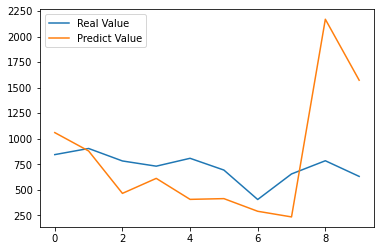

In [16]:
compare = pd.DataFrame(list(zip(list_eval, list_hasil)), columns =['Real Value', 'Predict Value'])
compare.plot()